In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
df = pd.read_csv("King_County_house_prices_dataset.csv")

# handling bathrooms
df["bathrooms"] = df["bathrooms"].apply(lambda x: round(x))

# convert variables
# following variables are in thousand dollars and sqft
df["price"] = df["price"].apply(lambda x: x*0.001)
df["sqft_lot"] = df["sqft_lot"].apply(lambda x: x*0.001)
df["sqft_living"] = df["sqft_living"].apply(lambda x: x*0.001)
df["sqft_above"] = df["sqft_above"].apply(lambda x: x*0.001)
df["sqft_living15"] = df["sqft_living15"].apply(lambda x: x*0.001)
df["sqft_lot15"] = df["sqft_lot15"].apply(lambda x: x*0.001)

df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')
df["sqft_basement"] = df["sqft_basement"].apply(lambda x: x*0.001)

df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221.9,3,1,1.18,5.650,1.0,NaN,0.0,...,7,1.18,0.00,1955,0.0,98178,47.5112,-122.257,1.34,5.650
1,6414100192,12/9/2014,538.0,3,2,2.57,7.242,2.0,0.0,0.0,...,7,2.17,0.40,1951,1991.0,98125,47.7210,-122.319,1.69,7.639
2,5631500400,2/25/2015,180.0,2,1,0.77,10.000,1.0,0.0,0.0,...,6,0.77,0.00,1933,NaN,98028,47.7379,-122.233,2.72,8.062
3,2487200875,12/9/2014,604.0,4,3,1.96,5.000,1.0,0.0,0.0,...,7,1.05,0.91,1965,0.0,98136,47.5208,-122.393,1.36,5.000
4,1954400510,2/18/2015,510.0,3,2,1.68,8.080,1.0,0.0,0.0,...,8,1.68,0.00,1987,0.0,98074,47.6168,-122.045,1.80,7.503


### Map and filter the data 

In [9]:
df.long.describe()

count    21597.000000
mean      -122.213982
std          0.140724
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

<AxesSubplot:xlabel='long', ylabel='lat'>

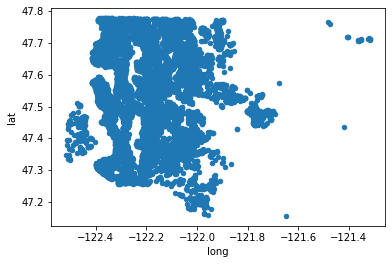

In [33]:
df_2 = df.copy()
#df_2 = df_2.query("long < (-122.125000)")
df_2.shape
df_2.plot.scatter(x = 'long', y = 'lat')

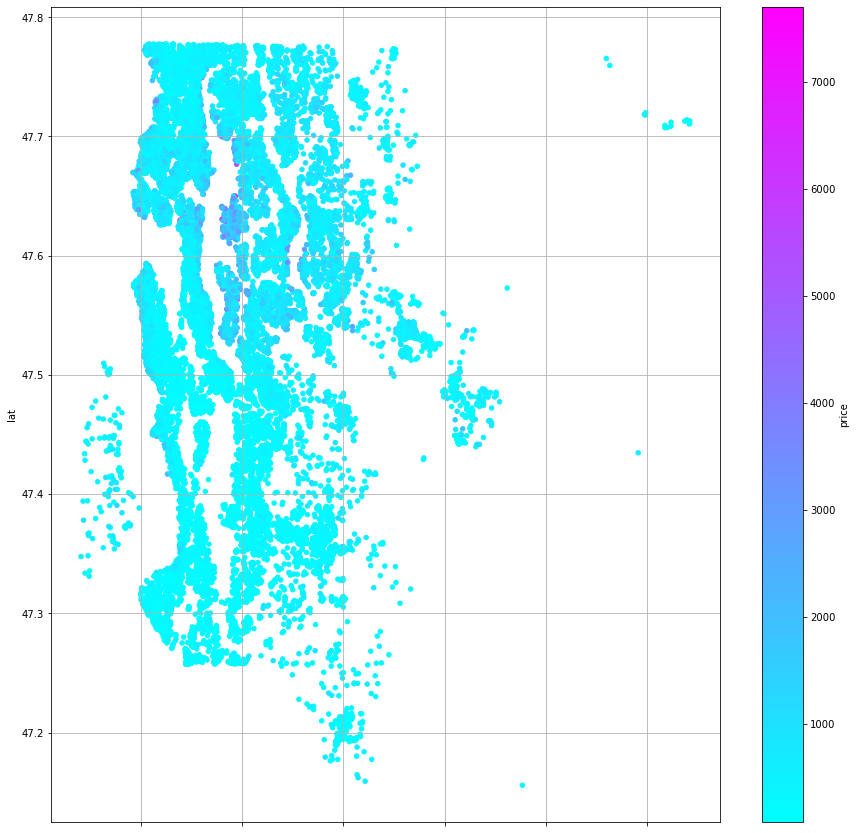

In [32]:
df_2.plot(kind = 'scatter', x = 'long', y = 'lat', grid=True, alpha = 2, figsize = (15,15),c = 'price', colorbar = True, cmap=plt.get_cmap("cool"));

In [55]:
df_nature = df_2.query("long >= -122")
df_nature.shape
#df_nature.long.describe()

(1496, 22)

In [57]:
df_city = df_2.query("long < -122")
df_city.shape
#df_city.long.describe()

(20101, 22)

In [67]:
# filter
df_city = df_city.query("bedrooms >= 2 and bedrooms <= 4 and condition >= 3 and price <= 496")
df_city.shape
#df_city.price.describe()

(1948, 22)

In [71]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [73]:
import folium
from folium.plugins import HeatMap
# Visualizing the surrounding 
maxpr=df_city.loc[df_city['price'].idxmax()]

def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_city_copy = df_city.copy()
df_city_copy['count'] = 1
basemap = generateBaseMap()
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_city_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

In [75]:
df_nature = df_2.query("long >= -122")
df_nature.shape
#df_nature.long.describe()

(1496, 22)

In [80]:
df_nature = df_nature.query("bedrooms >= 2 and bedrooms <= 4 and condition >= 3 and price <= 619")
print(df_nature.shape)
print(df_nature.price.describe())

(1018, 22)
count    1018.000000
mean      404.100031
std       113.425693
min       122.000000
25%       315.125000
50%       410.250000
75%       495.000000
max       619.000000
Name: price, dtype: float64


In [74]:
# Visualizing the surrounding 
maxpr=df_nature.loc[df_nature['price'].idxmax()]

def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_nature = df_nature.copy()
df_nature['count'] = 1
basemap = generateBaseMap()
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_nature[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap